In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_CUDNN_OPTS'] = '0'
os.environ['DEEPREG_LOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
# Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

In [3]:
# Loading model
test_model = tf.keras.models.load_model('SegNet.keras')

In [4]:
# Loading weights
# test_model.load_weights(filepath='./weights_checkpoint/autoencoder_checkpoint.weights.h5')

In [5]:
# Incarca setul de date

# Defineste calea pentru seturile de date
path_test_image = os.path.join("data/val_image")

# Creaza liste cu denumirea fisierelor
list_path_test_image = os.listdir(path_test_image)

# Ordoneaza listele (os.listdir - nu ordoneaza rezultatul returnat)
list_path_test_image.sort()


print(path_test_image)
print(list_path_test_image)

data/val_image
['136_00090.png', '136_00120.png', '136_00150.png', '136_00180.png', '136_00210.png', '136_00300.png', '136_00330.png', '136_00360.png', '136_00390.png', '136_00420.png']


In [6]:
# Creaza functia de incarcare si pre-procesare a bazei de date

def load_resize_dataset(path_image_dataset, list_path_img, WIDTH, HEIGHT):

    list_images = []

    for path_image in list_path_img:

        path_image = path_image_dataset + '/' + path_image

        image = cv2.imread(path_image, cv2.IMREAD_COLOR) # IMREAD_COLOR, IMREAD_GRAYSCALE, IMREAD_UNCHANGED
    
        dim_image = (WIDTH, HEIGHT)
        image = cv2.resize(image, dim_image, interpolation = cv2.INTER_AREA)

        list_images.append(image)
        
        cv2.destroyAllWindows()

    # to array
    images_array = np.asarray(list_images, dtype=np.uint8)

    return images_array

In [7]:
# Define the desired resolution
WIDTH, HEIGHT = 512, 1024 

In [8]:
# Create the training dataset
X = load_resize_dataset(path_test_image, list_path_test_image, WIDTH, HEIGHT)
# Normalize the dataset
X = tf.cast(X , tf.float32) / 255.0

In [9]:
# Make some predictions
y_preb = test_model.predict(X)


I0000 00:00:1757333165.231649   53319 service.cc:145] XLA service 0x739dc000ad90 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757333165.231678   53319 service.cc:153]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1757333165.380481   53319 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [10]:
threshold = 0.5
y_probs = tf.where(y_preb > threshold, 1, y_preb)
y_probs = tf.where(y_preb <= threshold, 0, y_preb)

# Highlight the prediction, superimposed on the input image in the model
predict_y = (0.4 * X) + (0.6 * y_preb)

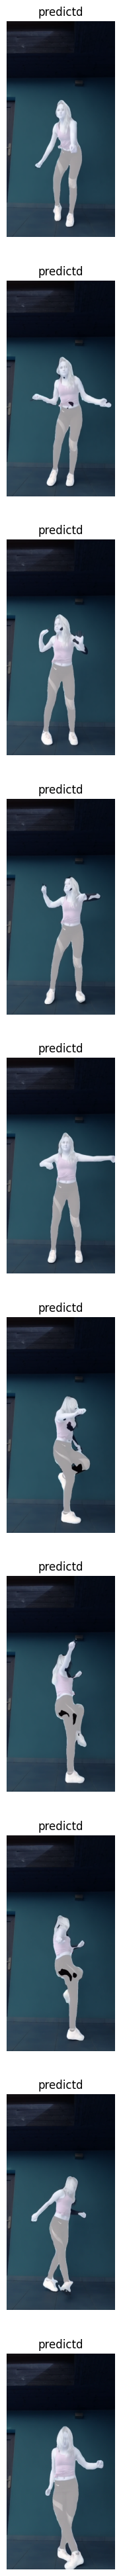

In [11]:
# Show predictions compared to reality

row = len(X)

plt.figure(figsize = (5, 50))
n = 0
for i in range(0, row, 1):
    
    plt.subplot(row, 1, i + 1)
    plt.imshow(predict_y[i])
    plt.title('predictd')
    plt.axis('off')

plt.show()